# Herkenning van handgeschreven cijfers met CNN

## Convolutionele Neurale Netwerken

- Minor AAI - Hogeschool van Amsterdam
- Docenten:  Michiel Bontenbal & Maarten Post
- Vrijdag 7 februari 2025
- This notebook has been tested on Python 3.12.

### Boek & tutorials:

**Deep Learning with Python - Francois Chollet - Chapter 8**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/

**Tutorials**
- https://keras.io/examples/vision/mnist_convnet/ 
- https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ 

**Author:** 
[Francois Chollet, the creator of Keras](@fchollet.bsky.social)<br>

## Setup

In [1]:
from platform import python_version
print(python_version())

3.12.6


In [18]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import numpy as np
print(f'numpy = {np.__version__}')
import tensorflow
print(f'tensorflow = {tensorflow.__version__}')
import keras
print(f'keras = {keras.__version__}')

#You can ignore the warning

numpy = 2.2.2
tensorflow = 2.18.0
keras = 3.8.0


In [5]:
#inspect the keras package with dir
print(dir(keras))

['DTypePolicy', 'FloatDTypePolicy', 'Function', 'Initializer', 'Input', 'InputSpec', 'KerasTensor', 'Layer', 'Loss', 'Metric', 'Model', 'Operation', 'Optimizer', 'Quantizer', 'Regularizer', 'Sequential', 'StatelessScope', 'SymbolicScope', 'Variable', '__all__', '__builtins__', '__cached__', '__dir__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'activations', 'applications', 'backend', 'callbacks', 'config', 'constraints', 'datasets', 'device', 'distribution', 'dtype_policies', 'export', 'initializers', 'layers', 'legacy', 'losses', 'metrics', 'mixed_precision', 'models', 'name_scope', 'ops', 'optimizers', 'preprocessing', 'quantizers', 'random', 'regularizers', 'saving', 'tree', 'utils', 'version', 'visualization', 'wrappers']


## Prepare the data

In [6]:
# Model / data parameters
num_classes = 10  #klassen zijn cijfers 0 tm 9
input_shape = (28, 28, 1) 
 
# Load the data and split it between train and test sets

# In Keras we have the following convention:
#  x_train = images (of training set)
#  y_train = labels


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
#inspect the shape of one image
x_train.shape

(60000, 28, 28)

In [8]:
#inspect the label of that image
y_train[0]

np.uint8(5)

<function matplotlib.pyplot.show(close=None, block=None)>

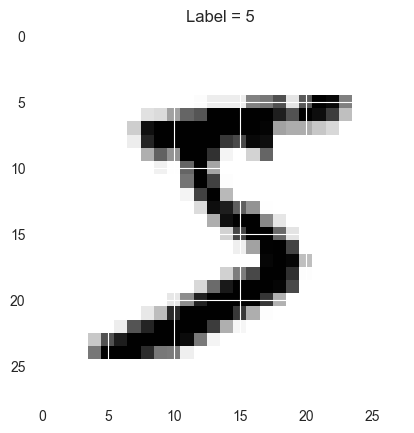

In [9]:
#show the first image

import matplotlib.pyplot as plt
image = x_train[0]
plt.imshow(image, cmap=plt.cm.binary)
plt.title(f'Label = {y_train[0]}')
plt.show

In [10]:
#Check the pixelvalues of row 5 of the image 
print(x_train[0][5])

[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


### We will now normalize the values and convert classes to values

In [11]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [1]:
from keras import layers

cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2,2), activation="relu",),
        
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),

        layers.Flatten(),
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

NameError: name 'keras' is not defined

In [13]:
# give a summary of the model. 

cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,850 (46.29 KB)

 Trainable params: 11,850 (46.29 KB)

 Non-trainable params: 0 (0.00 B)

## Set the hyper parameters & train the model

In [19]:
#Set the hyper parameters. 

batch_size = 128
epochs = 20

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
#train the model
history_cnn = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
history_cnn

Epoch 1/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9637 - loss: 0.1257 - val_accuracy: 0.9750 - val_loss: 0.0938
Epoch 2/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9680 - loss: 0.1097 - val_accuracy: 0.9748 - val_loss: 0.0906
Epoch 3/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9713 - loss: 0.0996 - val_accuracy: 0.9770 - val_loss: 0.0809
Epoch 4/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9728 - loss: 0.0935 - val_accuracy: 0.9758 - val_loss: 0.0831
Epoch 5/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9758 - loss: 0.0812 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 6/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9761 - loss: 0.0791 - val_accuracy: 0.9770 - val_loss: 0.0752
Epoch 7/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9776 - loss: 0.0758 - val_accuracy: 0.9777 - val_loss: 0.0742
Epoch 8/300
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9790 - loss: 0.0695 - 

## Evaluate the trained model

In [16]:
score = cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1252637803554535
Test accuracy: 0.963100016117096


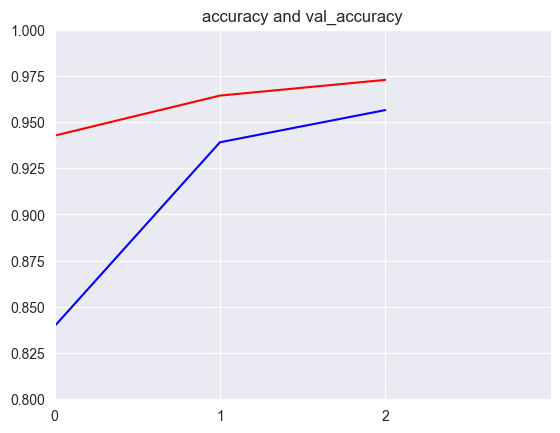

In [17]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], 'blue')
plt.plot(history_cnn.history['val_accuracy'], 'red')
plt.title('accuracy and val_accuracy')
plt.ylim(0.8, 1.0)
plt.xlim(0, epochs)
plt.xticks(range(0, epochs))

plt.show()

### OPDRACHT: Pas je CNN aan. 

Je kan je CNN verder optimaliseren door de Hyperparameters aan te passen. Dit zijn **bijvoorbeeld**:
- extra lagen in het CNN
- Aantal filters 
- Kernel size variëren (bijv. 2e Conv2D laag grotere kernel) 
- Average pooling vs Max Pooling
- Eventueel een dropout laag toevoegen (voorkomt o.a. overfitting)
- Een extra dense layer
- aantal epochs

Ook interessant: haal de 2D en pooling layers eens weg. Werkt het dan nog steeds? Wat is je accuracy?

Maak aantekeningen (in dit notebook) zodat je weet welke aanpassing welke verbetering opleverde.


In [ ]:
from keras import layers

cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),

        layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

cnn.summary()

# Hyperparameters
batch_size = 128
epochs = 30  # Number of epochs up 10

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training the model
history_cnn = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], 'blue')
plt.plot(history_cnn.history['val_accuracy'], 'red')
plt.title('accuracy and val_accuracy')
plt.ylim(0.8, 1.0)
plt.xlim(0, epochs)
plt.xticks(range(0, epochs))

plt.show()

1. Added a second Conv2D layer with 64 filters and a kernel size of (5, 5).
2. Added a Dropout layer with a dropout rate of 0.5 to prevent overfitting.
3. Added a Dense layer with 128 units and ReLU activation before the final output layer.
4. Increased the number of epochs from 20 to 30.

### Reflectie
Deze vragen gaan over het begrip van het model wat je hebt gebruikt. 
Beantwoord de volgende vragen in je eigen woorden. 

1. Welke lagen heb je gebruikt in je model?

Answer 1: Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2. Beschrijf kort hoe de Conv2D laag werkt (in je eigen woorden)

Answer 2: Conv2D creates a convolution kernel that is convolved with the layer input over a 2D spatial (or temporal) dimension (height and width) to produce a tensor of outputs.

3. Waarom gebruik je een pooling laag?

Answer 3: A pooling layer lowers the amount of spacial dimensions in the data, which reduces the amount of parameters and computation in the network.

4. Wat doet de dense laag?

Answer 4: The dense layer is a fully connected layer that connects all neurons from the previous layer to the next layer.